# CSE 366: Artificial Intelligence - Computer Vision Assignment

**Objective:**
This assignment is designed to give you practical experience in developing and training deep
learning models for computer vision tasks. You have the option to focus on either image
classification or object detection, using specific datasets and model architectures.

# **Option 2: Object Detection**
• Dataset: Use the dataset available at this [link](https://data.mendeley.com/datasets/8h3s6jkyff/1). This dataset includes images for object detection tasks.

Link: https://data.mendeley.com/datasets/8h3s6jkyff/1

 Models to Implement: Choose to implement one of the following models:


*   YOLOv8
*   YOLOv9

I have choosen YOLOv8 for this Assignment.


Focus on detecting objects within the images, quantifying the precision, recall, and mAP (mean
Average Precision) of your model. Additionally, discuss the challenges faced during model
implementation and tuning.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun May 19 16:22:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLOv8
⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place with version YOLOv8.0.196.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an issue on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Roboflow Universe



Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




## Inference with Pre-trained COCO Model

# CLI

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qXfWYTgvmYkg3yXOwsMs")
project = rf.workspace("ewucse").project("tomatoplantfactorydataset")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unin

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TomatoPlantfactoryDataset-1 in yolov8:: 100%|██████████| 1052/1052 [00:00<00:00, 4187.86it/s]


# Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 197MB/s]
New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/TomatoPlantfactoryDataset-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   R_curve.png	       val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv	       val_batch0_pred.jpg
confusion_matrix.png				   results.png	       val_batch1_labels.jpg
events.out.tfevents.1716135859.edc0c5f5ccac.822.0  train_batch0.jpg    val_batch1_pred.jpg
F1_curve.png					   train_batch1.jpg    val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch2.jpg    val_batch2_pred.jpg
labels.jpg					   train_batch345.jpg  weights
P_curve.png					   train_batch346.jpg
PR_curve.png					   train_batch347.jpg


/content


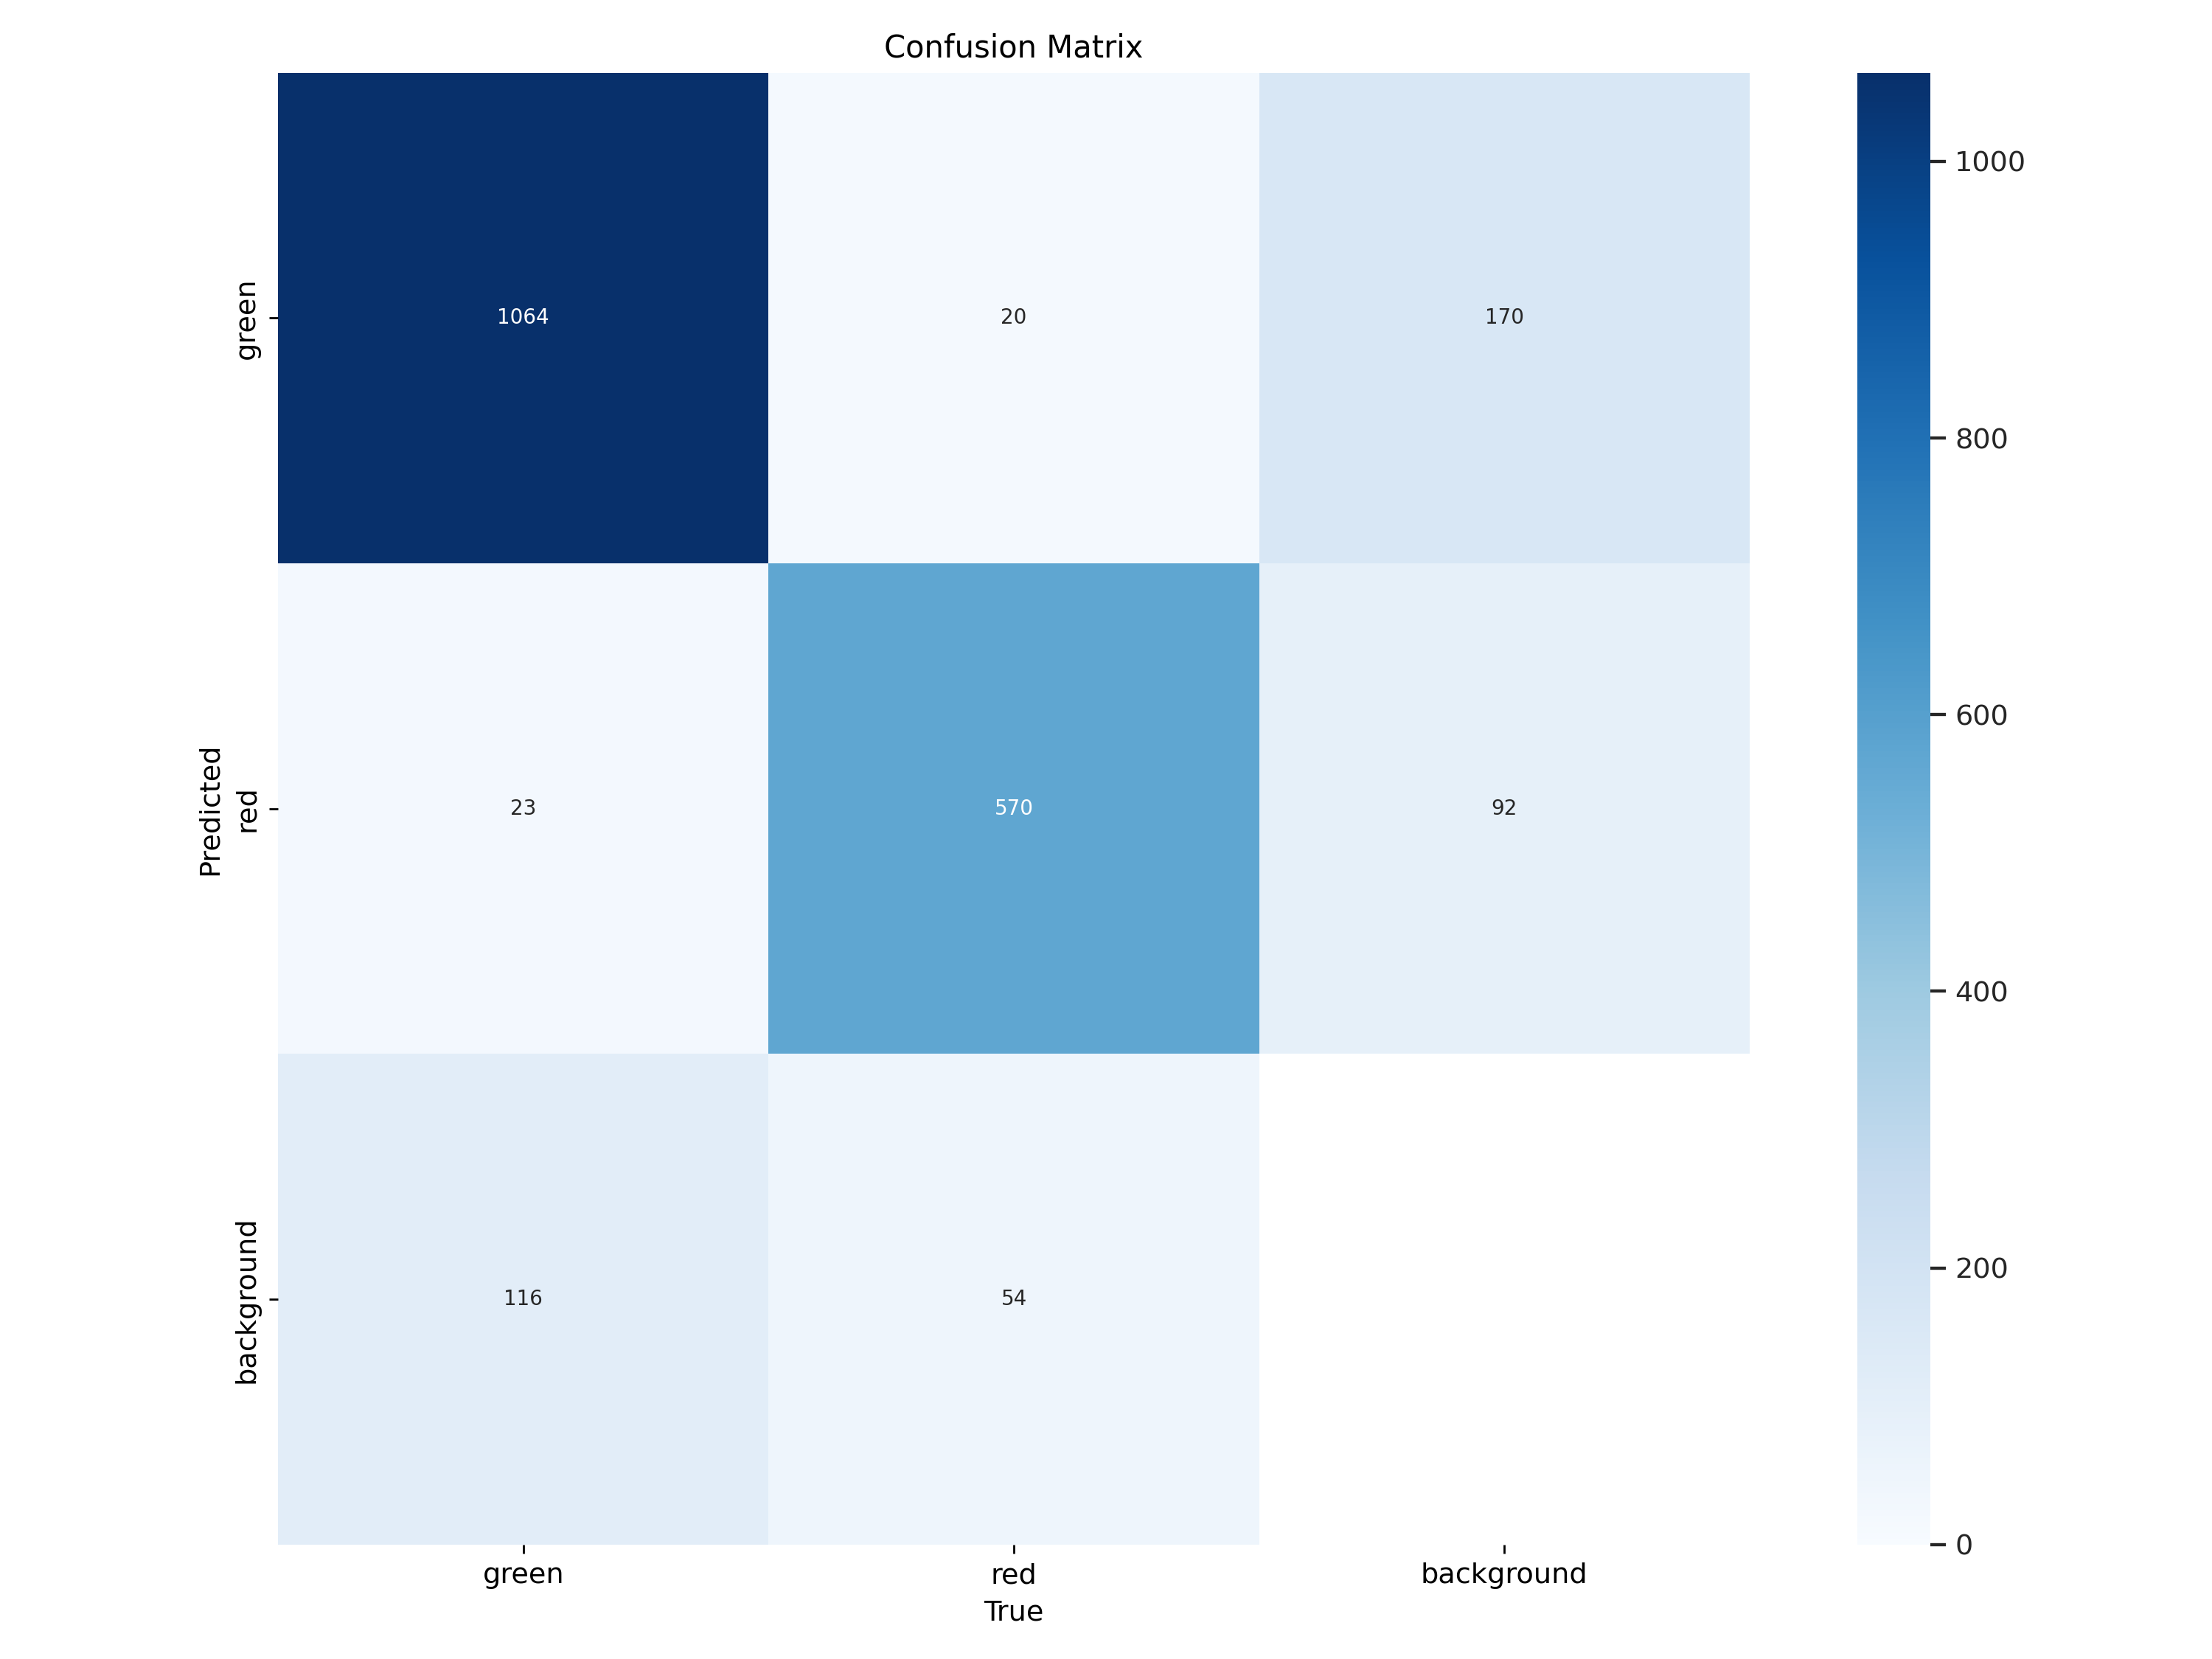

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


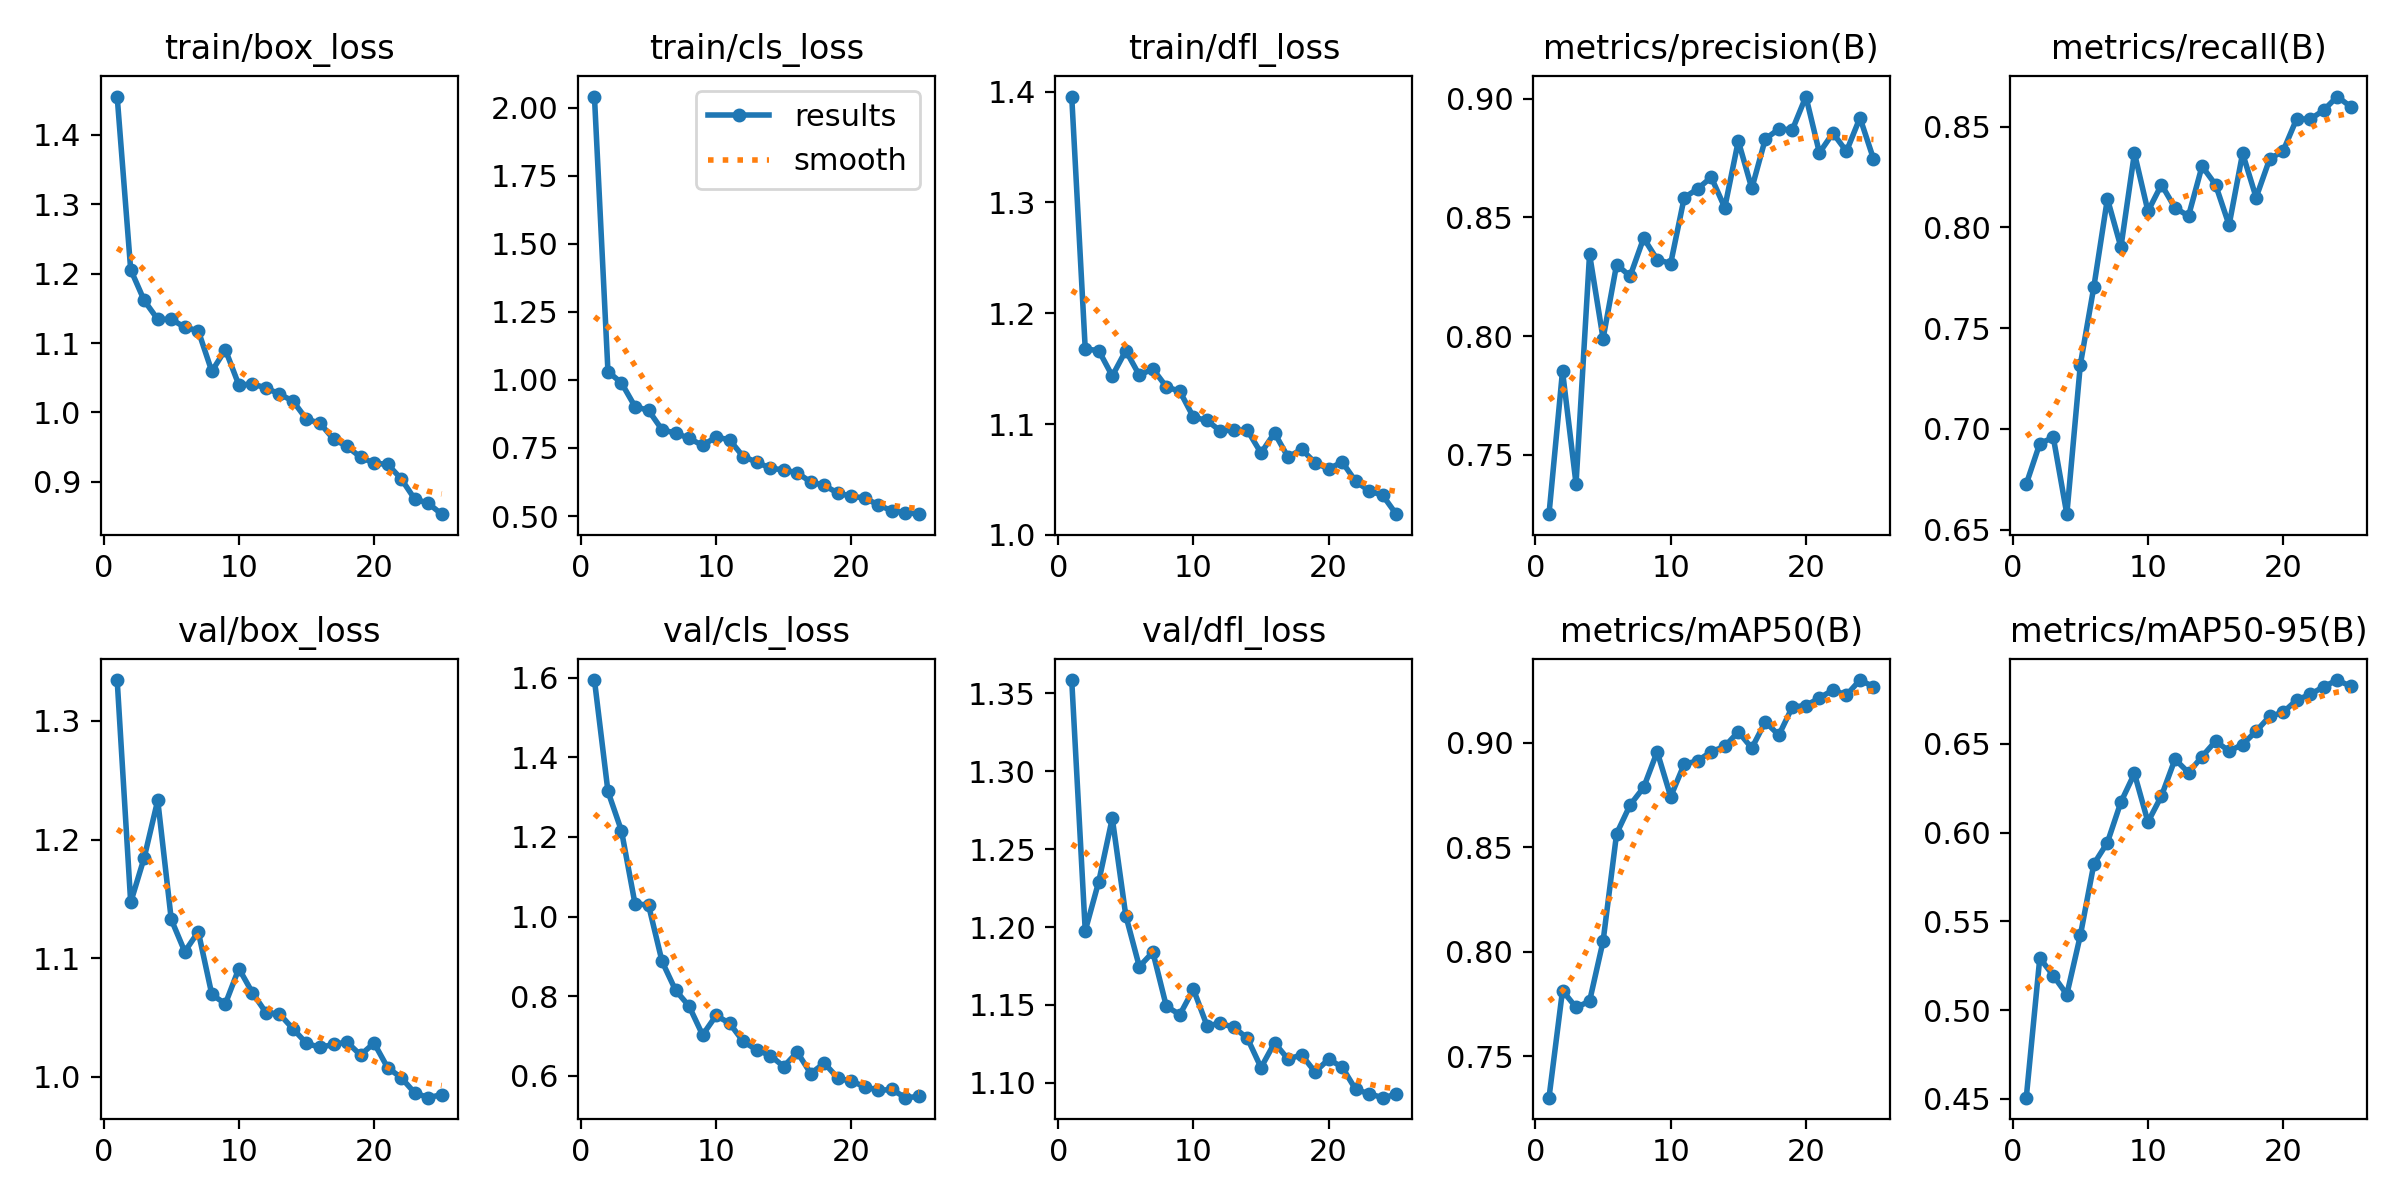

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


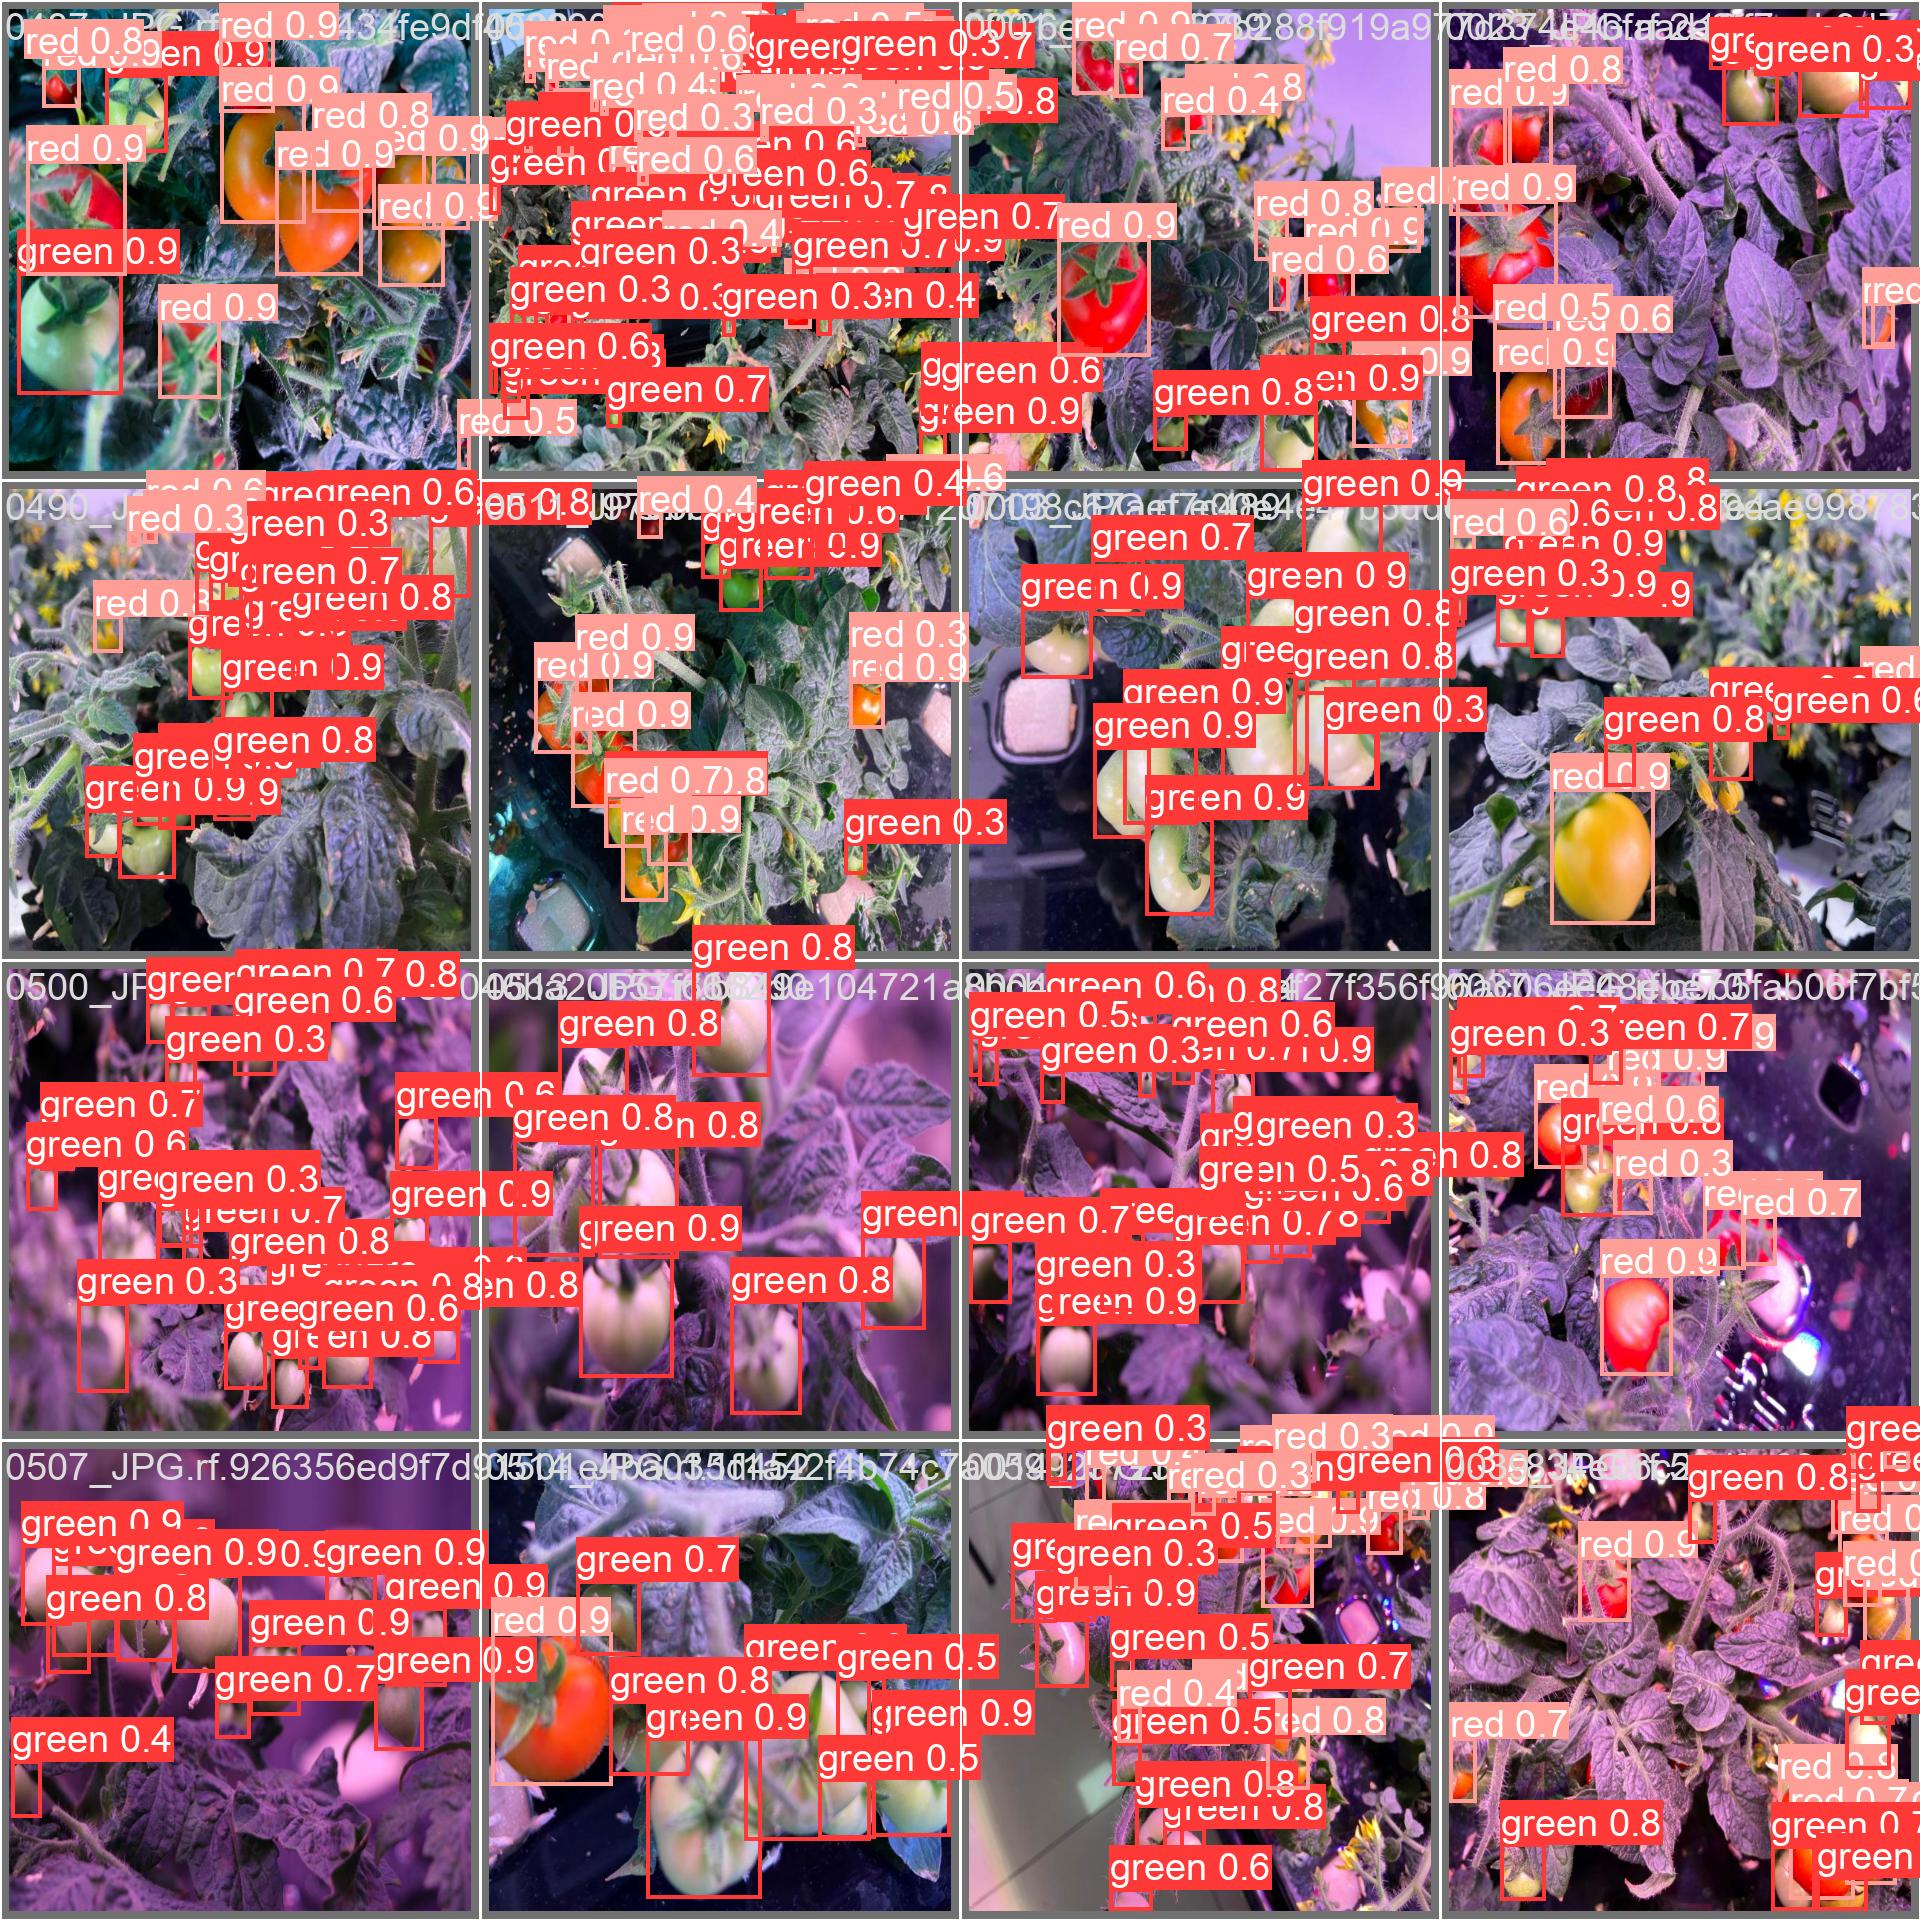

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/TomatoPlantfactoryDataset-1/valid/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:15<00:00,  2.25s/it]
                   all        104       1847      0.892      0.864      0.929      0.687
                 green        104       1203      0.893      0.863      0.932       0.68
                   red        104        644       0.89      0.865      0.926      0.694
Speed: 5.6ms preprocess, 19.5ms inference, 0.0ms 

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/52 /content/datasets/TomatoPlantfactoryDataset-1/test/images/0007_JPG.rf.81ecb6e9a13e88b34bffaa0f9abf11c7.jpg: 800x800 16 greens, 3 reds, 22.5ms
image 2/52 /content/datasets/TomatoPlantfactoryDataset-1/test/images/0015_JPG.rf.80b5b10971b7fed7327ee424e01760ed.jpg: 800x800 17 greens, 22.5ms
image 3/52 /content/datasets/TomatoPlantfactoryDataset-1/test/images/0016_JPG.rf.367c5689bc332f04db9d4c4d4c6378de.jpg: 800x800 15 greens, 22.4ms
image 4/52 /content/datasets/TomatoPlantfactoryDataset-1/test/images/0049_JPG.rf.7fc84b72cc072e6f1f684023d29387cb.jpg: 800x800 12 greens, 14 reds, 22.4ms
image 5/52 /content/datasets/TomatoPlantfactoryDataset-1/test/images/0064_JPG.rf.cb07bde24059170fbca944256b6a2ec9.jpg: 800x800 12 greens, 22.5ms
image 6/52 /content/datasets/TomatoPlantfactoryDataset-1/test/images/0068_JPG.r

**NOTE:** Let's take a look at few results.

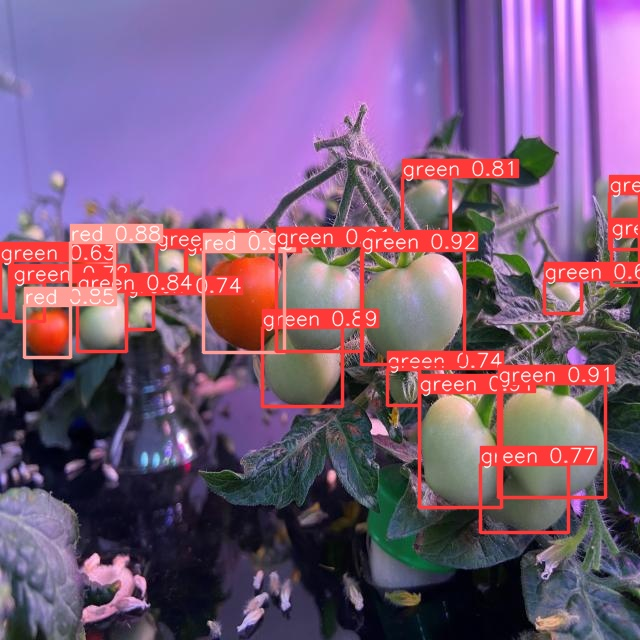

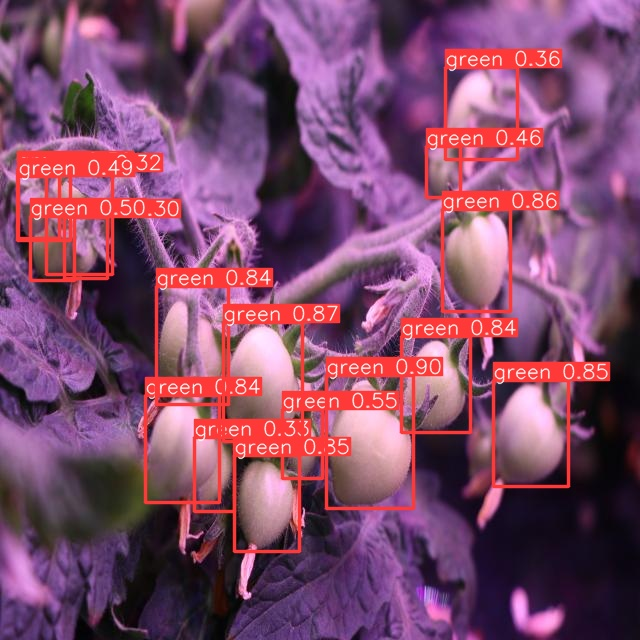

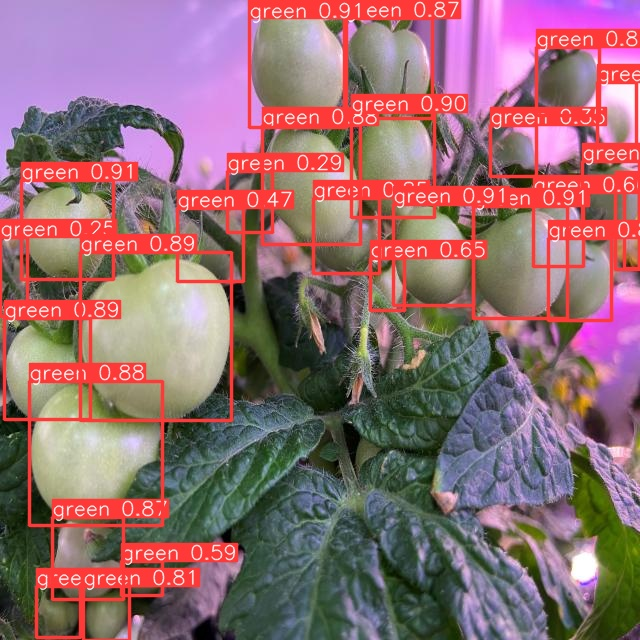

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/ewucse/tomatoplantfactorydataset/1
Share your model with the world at: https://universe.roboflow.com/ewucse/tomatoplantfactorydataset/model/1


While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
!ls /content/datasets/TomatoPlantfactoryDataset-1/test/images/

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = "/content/datasets/TomatoPlantfactoryDataset-1/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred


running inference on 0139_JPG.rf.e3a9aa258fa5cbac71ff887d50be3d77.jpg


{'predictions': [{'x': 413.0,
   'y': 308.5,
   'width': 104.0,
   'height': 113.0,
   'confidence': 0.9211120009422302,
   'class': 'green',
   'class_id': 0,
   'detection_id': 'c37e88fb-3e31-4a00-b615-61ec80f59823',
   'image_path': '/content/datasets/TomatoPlantfactoryDataset-1/test/images/0139_JPG.rf.e3a9aa258fa5cbac71ff887d50be3d77.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 552.5,
   'y': 441.5,
   'width': 109.0,
   'height': 113.0,
   'confidence': 0.9190346002578735,
   'class': 'green',
   'class_id': 0,
   'detection_id': '5619b9ab-709a-45e0-aea2-d362a2c02a18',
   'image_path': '/content/datasets/TomatoPlantfactoryDataset-1/test/images/0139_JPG.rf.e3a9aa258fa5cbac71ff887d50be3d77.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 461.5,
   'y': 450.0,
   'width': 83.0,
   'height': 114.0,
   'confidence': 0.9180619716644287,
   'class': 'green',
   'class_id': 0,
   'detection_id': '84c98101-bebb-4f8e-97cc-1c6e8aae1fa9',
   'image_path': '/content